In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
import jupyterthemes as jt

In [34]:
df_titanic1 = pd.read_csv('train_1.csv')
df_titanic2 = pd.read_csv('test_1.csv')

In [35]:
df_titanic1.drop(columns = ['Survived'], inplace = True)

In [36]:
df_titanic = pd.concat([df_titanic1,df_titanic2])
df_titanic.set_index(['PassengerId'], inplace = True)

In [37]:
df_titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df_titanic.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df_titanic.shape

(1309, 10)

In [40]:
df_titanic.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [41]:
df_titanic.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [42]:
df_titanic.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [43]:
edad = df_titanic['Age'].value_counts(ascending=False)

In [44]:
edad.head(10)

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
25.0    34
28.0    32
36.0    31
26.0    30
29.0    30
Name: Age, dtype: int64

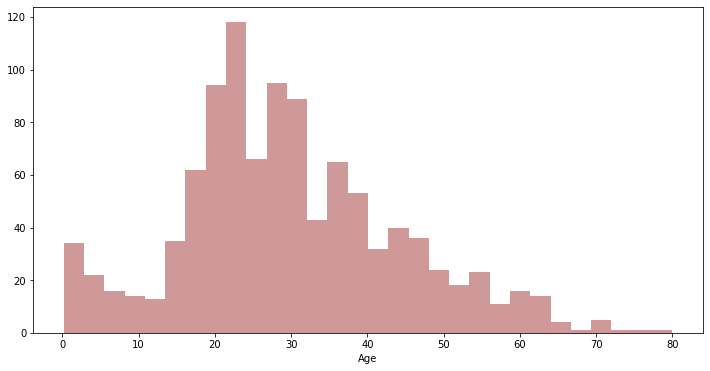

In [45]:
plt.figure(figsize=(12,6))
sns.distplot(df_titanic['Age'].dropna(),kde=False,color='darkred',bins=30)

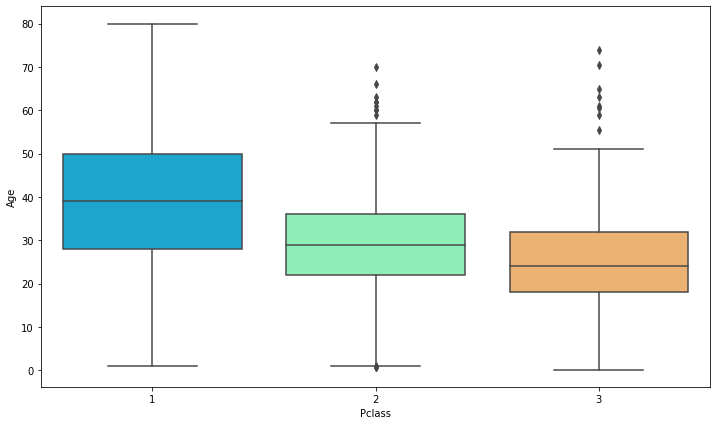

In [46]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_titanic,palette='rainbow')

In [47]:
df_titanic.iloc[0]

Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

In [48]:
lista_edad = []

for i in range(len(df_titanic)):
    if pd.isnull(df_titanic.iloc[i]['Age']):
        if df_titanic.iloc[i]['Pclass'] == 1:
            lista_edad.append(39)
        elif df_titanic.iloc[i]['Pclass'] == 2:
            lista_edad.append(29)
        else:
            lista_edad.append(25)
    else:
        lista_edad.append(df_titanic.iloc[i]['Age'])
        
df_titanic['Age'] = lista_edad

In [49]:
df_titanic.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [50]:
df_titanic[df_titanic['Embarked'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [51]:
df_titanic['Embarked']=df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0])

In [52]:
df_titanic['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [53]:
df_titanic['Fare']=df_titanic['Fare'].fillna(df_titanic['Fare'].mean())

In [54]:
df_titanic.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
dtype: int64

In [55]:
len(list(df_titanic['Name'].unique()))

1307

In [56]:
len(df_titanic['Name'])

1309

In [57]:
df_titanic['Name'][df_titanic['Name'].duplicated() == True]

PassengerId
892        Kelly, Mr. James
898    Connolly, Miss. Kate
Name: Name, dtype: object

In [58]:
print(df_titanic[df_titanic['Name'] == 'Kelly, Mr. James'])
print(df_titanic[df_titanic['Name'] == 'Connolly, Miss. Kate'])

             Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
PassengerId                                                               
697               3  Kelly, Mr. James  male  44.0      0      0  363592   
892               3  Kelly, Mr. James  male  34.5      0      0  330911   

               Fare Cabin Embarked  
PassengerId                         
697          8.0500   NaN        S  
892          7.8292   NaN        Q  
             Pclass                  Name     Sex   Age  SibSp  Parch  Ticket  \
PassengerId                                                                     
290               3  Connolly, Miss. Kate  female  22.0      0      0  370373   
898               3  Connolly, Miss. Kate  female  30.0      0      0  330972   

               Fare Cabin Embarked  
PassengerId                         
290          7.7500   NaN        Q  
898          7.6292   NaN        Q  


In [59]:
df_titanic['Title'] = df_titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [60]:
df_titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [61]:
df_titanic.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Jonkheer      1
Capt          1
Sir           1
Dona          1
Lady          1
Don           1
Countess      1
Name: Title, dtype: int64

In [62]:
df_titanic['Title'] = df_titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_titanic['Title'] = df_titanic['Title'].replace('Mlle', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace('Ms', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace('Mme', 'Mrs')

In [63]:
df_titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [64]:
df_titanic.Title.value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [65]:
df_titanic.drop(columns = ['Name'], inplace=True)

In [66]:
for j in df_titanic.columns:
    print(df_titanic[j].value_counts())

3    709
1    323
2    277
Name: Pclass, dtype: int64
male      843
female    466
Name: Sex, dtype: int64
25.00    242
39.00     59
24.00     47
29.00     46
22.00     43
        ... 
22.50      1
74.00      1
24.50      1
80.00      1
0.67       1
Name: Age, Length: 98, dtype: int64
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64
0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64
CA. 2343           11
CA 2144             8
1601                8
347077              7
S.O.C. 14879        7
                   ..
SOTON/OQ 392086     1
113050              1
364511              1
36866               1
28666               1
Name: Ticket, Length: 929, dtype: int64
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
8.0292      1
12.7375     1
8.6542      1
34.0208     1
7.1417      1
Name: Fare, Length: 282, dtype: int64
C23 C25 C27        6
B57 B59 B63 B66    5
G6  

In [67]:
df_titanic.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Title        object
dtype: object

In [68]:
df_titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [69]:
df_titanic['Sex'] = df_titanic['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [70]:
len(df_titanic['Ticket'].unique())

929

In [71]:
df_titanic.drop('Ticket', axis=1, inplace=True)

In [72]:
len(df_titanic['Cabin'].unique())

187

In [73]:
df_titanic['Cabin'].isnull().sum()

1014

In [74]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [75]:
df_titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [76]:
embarked = pd.get_dummies(df_titanic['Embarked'])

In [77]:
embarked.head()

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [78]:
df_titanic.insert(8,'Cherbourg',embarked['C'])
df_titanic.insert(9,'Queenstown',embarked['Q'])
df_titanic.insert(10,'Southampton',embarked['S'])

In [79]:
df_titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [80]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [81]:
transform1 = LabelEncoder()
transform1.fit_transform(['C','Q','S'])
print(transform1.classes_)
print(transform1.transform(df_titanic['Embarked']))

prueba = transform1.transform(df_titanic['Embarked'])

['C' 'Q' 'S']
[2 0 2 ... 2 2 0]


In [82]:
transform2 = OneHotEncoder() 
transform2.fit_transform(prueba.reshape(len(prueba), 1)).toarray()

C:\Users\etesone\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [83]:
df_titanic.drop('Embarked', axis=1, inplace=True)

In [84]:
mapeo = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_titanic['Title'] = df_titanic['Title'].map(mapeo)

In [85]:
df_titanic.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
Cherbourg      0
Queenstown     0
Southampton    0
dtype: int64

In [86]:
df_titanic.dtypes

Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Title            int64
Cherbourg        uint8
Queenstown       uint8
Southampton      uint8
dtype: object

In [87]:
#### Conjuntos Train-Test

In [88]:
titanic_y = pd.read_csv('titanic-y.csv',sep = ';')

In [89]:
titanic_y.set_index('PassengerId', inplace=True)

In [92]:
titanic_y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [93]:
titanic_y.Survived.unique()

array([0, 1], dtype=int64)

In [94]:
 X_train, X_test, y_train, y_test = train_test_split( df_titanic,
                        titanic_y,
                        test_size=0.2,
                        random_state=42,
                        stratify = titanic_y)

In [95]:
len(X_train)

1047

In [96]:
len(X_test)

262

In [97]:
len(y_train)

1047

In [98]:
len(y_test)

262

In [99]:
traindf = pd.concat([X_train,y_train], axis=1)

In [100]:
traindf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Cherbourg,Queenstown,Southampton,Survived
PassengerId,,,,,,,,,,,
1022,3,0,32.0,0,0,8.0500,1,0,0,1,0
319,1,1,31.0,0,2,164.8667,2,0,0,1,1
925,3,1,25.0,1,2,23.4500,3,0,0,1,1
653,3,0,21.0,0,0,8.4333,1,0,0,1,0
1190,1,0,30.0,0,0,45.5000,1,0,0,1,0


In [101]:
testdf = X_test

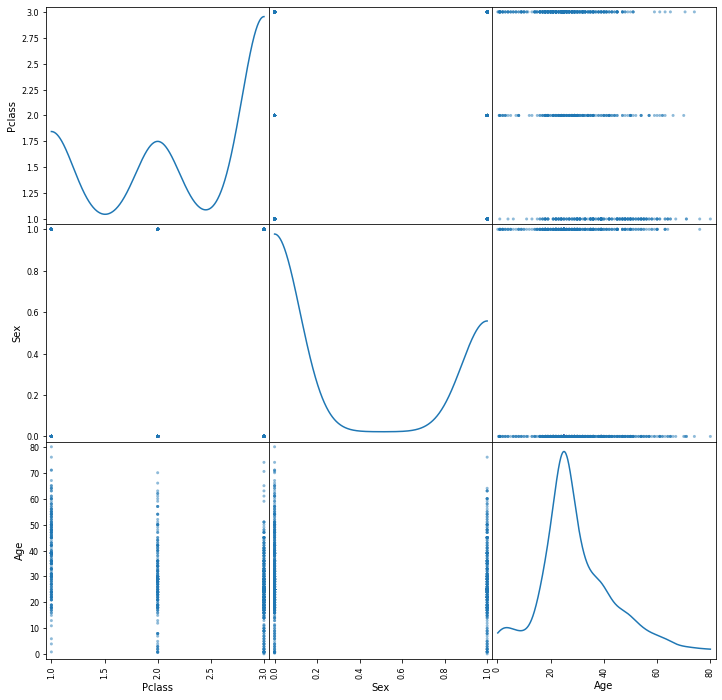

In [102]:
features = ['Pclass','Sex','Age']
from pandas.plotting import scatter_matrix

scatter_matrix(traindf[features], figsize = (12, 12), diagonal = 'kde');

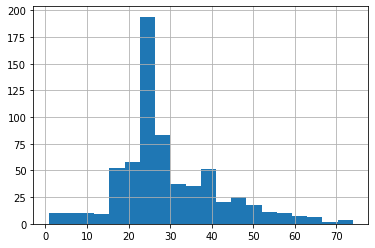

In [103]:
traindf['Age'][traindf['Survived']==0].hist(bins=20)

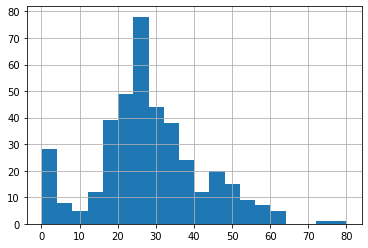

In [104]:
traindf['Age'][traindf['Survived']==1].hist(bins=20)

In [105]:
#### Al comparar los histogramas de los que han sobrevivido por edades se puede ver que la supervivencia aumenta por debajo de los 20 años y vuelve aumentar en torno a los 30 y los 45 años. Esto se puede utilizar para realizar una agrupación de las variables. Podemos ver como se comporta el modelo en una primera versión y añadir una transformación de variables

In [106]:
### Escalado de Características

In [107]:
## Prueba ejemplo de escalado (cuando el modelo de ML le da más importancia a una categoría que a otra).

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
prueba_escalado = sc.fit_transform(X_train)

In [108]:
prueba_escalado[0]

array([ 0.83946169, -0.74857042,  0.20352157, -0.47350156, -0.42482001,
       -0.47346752, -0.71760571, -0.49940298, -0.32495634,  0.64706969])

In [109]:
#### Podemos normalizar o estandarizar

#### Estandarizar =  ( x – media(x) ) / desviación típica(x)
#### Normalizar = (x-min(x) / max-min(x))

#### Con esto conseguimos que ninguna variable domine sobre otraabs

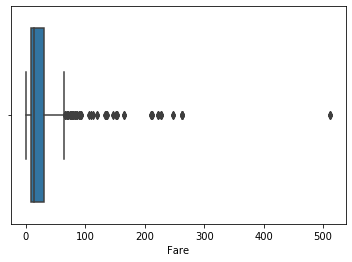

In [110]:
sns.boxplot(x=X_train['Fare'])

In [111]:
X_train[X_train['Fare'] > 262]

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,,,
1267,1,1,45.0,0,0,262.3750,2,1,0,0
1034,1,0,61.0,1,3,262.3750,1,1,0,0
945,1,1,28.0,3,2,263.0000,2,0,0,1
956,1,0,13.0,2,2,262.3750,4,1,0,0
1235,1,1,58.0,0,1,512.3292,3,1,0,0
743,1,1,21.0,2,2,262.3750,2,1,0,0
680,1,0,36.0,0,1,512.3292,1,1,0,0
312,1,1,18.0,2,2,262.3750,2,1,0,0
738,1,0,35.0,0,0,512.3292,1,1,0,0


In [112]:
#### Hay varias maneras de "corregir" estos outliers. Aquí se va a utilizar la función matemática Z_score

In [113]:
z = np.abs(stats.zscore(X_train['Fare']))
print(z)

[0.47346752 2.45248078 0.1861282  ... 0.48380801 0.0639157  0.47634465]


In [114]:
threshold = 3
print(np.where(z > 3))

(array([   7,    8,   35,  127,  183,  184,  199,  219,  271,  274,  328,
        329,  420,  508,  535,  684,  725,  726,  741,  771,  786,  790,
        793,  829,  837,  862,  873,  926,  952, 1004, 1030, 1043],
      dtype=int64),)


In [115]:
X_train.reset_index().iloc[7]

PassengerId    1267.000
Pclass            1.000
Sex               1.000
Age              45.000
SibSp             0.000
Parch             0.000
Fare            262.375
Title             2.000
Cherbourg         1.000
Queenstown        0.000
Southampton       0.000
Name: 7, dtype: float64

In [116]:
traindf.to_csv('train_titanic.csv')

In [117]:
testdf.to_csv('test_titanic.csv')